In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scratchNNlib import NN

from scratchNNlib import NN
from scratchNNlib.Layers import LinearLayer
from scratchNNlib.Loss import MeanSquare, RootMeanSquare

In [3]:
class LinearNet(NN):
    def __init__(self):
        super().__init__()
        self.chain = [
            LinearLayer(1, 1),
        ]

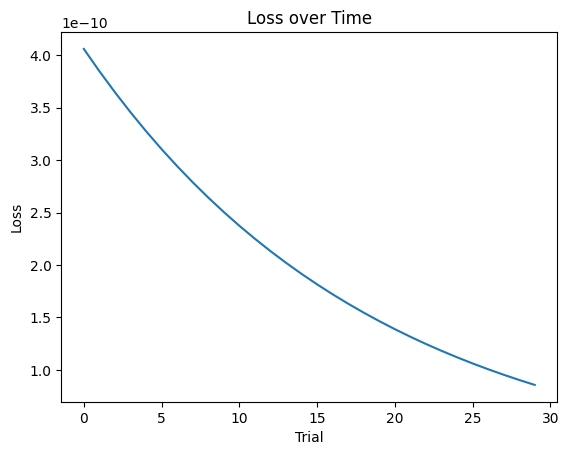

A final weight of [[9.99708402]] vs 10
A final bias of [[-0.70810942]] vs -1


In [4]:
if __name__ == "__main__":
    epochs = 30
    lr = 0.0001
    
    loss_function = MeanSquare()
    network = LinearNet()
    
    x_train = np.linspace(-100,100, num = 1000).reshape(1000, 1, 1)
    y_train = 10 * x_train - 1
    
    samples = len(x_train)
    
    toPlot = [[i for i in range(epochs)], []]

    for i in range(epochs):
        error = 0
        for sample in range(samples):
            output = network.forwardProp(x_train[sample])
            #print(f'NN output: {output}, expected value: {y_train[sample]}')
        
            error = loss_function(output, y_train[sample])
            
            #print(f'Loss: {secondTryLoss}')
        
            loss = loss_function.backward()
            #print(f'Loss: {loss}')
            network.backProp(loss, lr)
        error /= samples
        toPlot[1].append(error)
        #print('epoch %d/%d   error=%f' % (i+1, epochs, error))
        

plt.plot(*toPlot)
plt.title('Loss over Time')
plt.xlabel('Trial')
plt.ylabel('Loss')
plt.show()

print(f'A final weight of {network.chain[0].weights} vs 10')
print(f'A final bias of {network.chain[0].bias} vs -1')